In [0]:
sc

SparkContext 

 Spark UI 

 
 Version 
 v3.1.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

d
  
Regresja liniowa jest to liniowe przybliżenie zależności przyczynowo-skutkowych pomiędzy przynajmniej dwiema zmiennymi.

W typowej sytuacji proces analizy rozpoczyna się od zebrania danych na temat próby, na których następnie tworzony jest model, na podstawie którego z kolei staramy się wyciągnąć wnioski na temat populacji.

In [0]:
%fs
ls dbfs:/FileStore/tables/

path,name,size
dbfs:/FileStore/tables/SmokingAndTobaccoData2008-1.csv,SmokingAndTobaccoData2008-1.csv,33232
dbfs:/FileStore/tables/SmokingAndTobaccoData2008-2.csv,SmokingAndTobaccoData2008-2.csv,33232
dbfs:/FileStore/tables/SmokingAndTobaccoData2008-3.csv,SmokingAndTobaccoData2008-3.csv,33232
dbfs:/FileStore/tables/SmokingAndTobaccoData2008-4.csv,SmokingAndTobaccoData2008-4.csv,33232
dbfs:/FileStore/tables/SmokingAndTobaccoData2008-5.csv,SmokingAndTobaccoData2008-5.csv,33232
dbfs:/FileStore/tables/SmokingAndTobaccoData2008-6.csv,SmokingAndTobaccoData2008-6.csv,33232
dbfs:/FileStore/tables/SmokingAndTobaccoData2008-7.csv,SmokingAndTobaccoData2008-7.csv,33232
dbfs:/FileStore/tables/SmokingAndTobaccoData2008-8.csv,SmokingAndTobaccoData2008-8.csv,33232
dbfs:/FileStore/tables/SmokingAndTobaccoData2008-9.csv,SmokingAndTobaccoData2008-9.csv,33232
dbfs:/FileStore/tables/SmokingAndTobaccoData2008.csv,SmokingAndTobaccoData2008.csv,33232


In [0]:
import pyspark

In [0]:
# File location and type
file_location = "/FileStore/tables/student_mat.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ";"

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


Pandas way

In [0]:
stud_mat = df.toPandas()
stud_mat.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


Model regresji liniowej składa się z dwóch podstawowych rodzajów zmiennych:

Zmiennej zależnej (najczęściej oznaczonej jako Y), która jest rzeczywistym przedmiotem badania. W analizie regresji badamy wpływ innych niezależnych zjawisk na zjawisko stojące pod znakiem zmiennej zależnej.
Zmiennych niezależnych (najczęściej oznaczanych jako x1, x2, x3, .., xn), które dobieramy do modelu w taki sposób, aby jak najlepiej przewidywały wartość zmiennej zależnej.

Najpopularniejszym sposobem szacowania parametrów modelu regresji liniowej jest metoda najmniejszych kwadratów (MNK). Oznacza ona, że rozwiązanie za jej pomocą układów równań będzie minimalizować sumę kwadratów błędów modelu.

Regresja liniowa jest jedną z najpopularniejszych metod analizy zależności przyczynowo-skutkowych między różnymi zjawiskami. 
W tym miejscu położymy nacisk na sformułowanie ‘zależności przyczynowo-skutkowych’, ponieważ jeśli to podstawowe założenie nie jest spełnione, być może regresja liniowa nie jest najlepszym rozwiązaniem.

In [0]:
#Wyciągnijmy interesujące nas zmienne do osobnego DataFrame

simple_reg = stud_mat[['G1','G3']]

In [0]:
import pandas as pd

In [0]:
simple_reg.describe()

,G1,G3
count,395.000000,395.000000
mean,10.908861,10.415190
std,3.319195,4.581443
min,3.000000,0.000000
25%,8.000000,8.000000
50%,11.000000,11.000000
75%,13.000000,14.000000
max,19.000000,20.000000


Out[8]: Text(0, 0.5, 'G3')

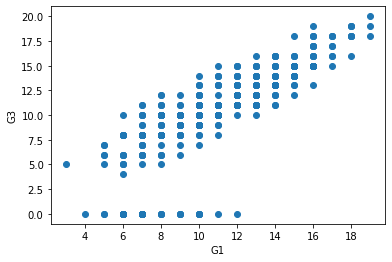

In [0]:
import matplotlib.pyplot as plt
plt.scatter(stud_mat['G1'],stud_mat['G3'])
plt.xlabel('G1')
plt.ylabel('G3')

In [0]:
clean_simple_reg = simple_reg[simple_reg['G3']>0]

In [0]:
y = clean_simple_reg['G3']
x1 = clean_simple_reg['G1']

Out[11]: Text(0, 0.5, 'G3')

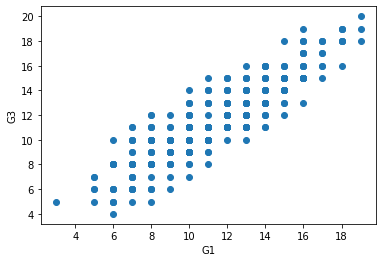

In [0]:
plt.scatter(x1,y)
plt.xlabel('G1')
plt.ylabel('G3')

In [0]:
import statsmodels.api as sm

In [0]:
x = sm.add_constant(x1)
model = sm.OLS(y,x).fit()

In [0]:
model.summary()

OLS Regression Results 
 
 Dep. Variable: G3 R-squared: 0.795 
 
 
 Model: OLS Adj. R-squared: 0.795 
 
 
 Method: Least Squares F-statistic: 1379. 
 
 
 Date: Mon, 06 Dec 2021 Prob (F-statistic): 2.47e-124 
 
 
 Time: 09:26:10 Log-Likelihood: -641.24 
 
 
 No. Observations: 357 AIC: 1286. 
 
 
 Df Residuals: 355 BIC: 1294. 
 
 
 Df Model: 1 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 const 1.5134 0.280 5.397 0.000 0.962 2.065 
 
 
 G1 0.8883 0.024 37.140 0.000 0.841 0.935 
 
 
 
 
 Omnibus: 3.940 Durbin-Watson: 1.697 
 
 
 Prob(Omnibus): 0.139 Jarque-Bera (JB): 3.518 
 
 
 Skew: 0.169 Prob(JB): 0.172 
 
 
 Kurtosis: 2.650 Cond. No. 42.8 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

Out[15]: Text(0, 0.5, 'G3')

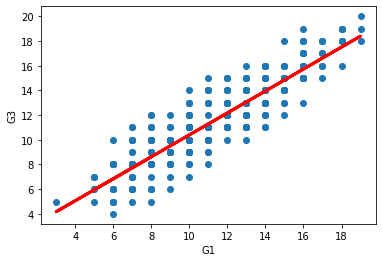

In [0]:
y_model = 0.8883*x1 + 1.5134
plt.plot(x1,y_model,color='red',lw=3)

plt.scatter(x1,y)

plt.xlabel('G1')
plt.ylabel('G3')

In [0]:
pd.get_dummies(stud_mat['sex'],drop_first=True)

,M
0,0
1,0
2,0
3,0
4,0
...,...
390,1
391,1
392,1
393,1


In [0]:
def normalize(X):
    scaled_X = X.copy()
    for col in scaled_X.columns:
        scaled_X[col] = (scaled_X[col]-scaled_X[col].min())/(scaled_X[col].max()-scaled_X[col].min())

    return scaled_X

clean_stud_mat = stud_mat[stud_mat['G3']>0]
scaled_x = normalize(clean_stud_mat[['absences','G1']])

In [0]:
x = pd.concat([scaled_x,pd.get_dummies(clean_stud_mat['sex'],drop_first=True)],axis=1)

x1 = sm.add_constant(x)
y = clean_stud_mat['G3']
model = sm.OLS(y,x1).fit()
model.summary()

OLS Regression Results 
 
 Dep. Variable: G3 R-squared: 0.807 
 
 
 Model: OLS Adj. R-squared: 0.805 
 
 
 Method: Least Squares F-statistic: 491.2 
 
 
 Date: Mon, 06 Dec 2021 Prob (F-statistic): 1.38e-125 
 
 
 Time: 09:26:11 Log-Likelihood: -631.00 
 
 
 No. Observations: 357 AIC: 1270. 
 
 
 Df Residuals: 353 BIC: 1286. 
 
 
 Df Model: 3 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 const 4.5343 0.231 19.658 0.000 4.081 4.988 
 
 
 absences -3.1597 0.699 -4.521 0.000 -4.534 -1.785 
 
 
 G1 13.9973 0.377 37.114 0.000 13.256 14.739 
 
 
 M 0.0451 0.152 0.296 0.767 -0.254 0.344 
 
 
 
 
 Omnibus: 1.823 Durbin-Watson: 1.734 
 
 
 Prob(Omnibus): 0.402 Jarque-Bera (JB): 1.796 
 
 
 Skew: 0.109 Prob(JB): 0.407 
 
 
 Kurtosis: 2.730 Cond. No. 11.7 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

Pyspark way

In [0]:
# File location and type
file_location = "/FileStore/tables/student_mat.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ";"

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [0]:
from pyspark.ml.feature import VectorAssembler
# defining end exam score as our label/predictor variable
dataset = df.select(df.G1, df.G3.alias('label'))

# split data into 70% training and 30% testing data
training, test = dataset.randomSplit([0.7, 0.3], seed = 100)

# assembler to assemble the features into vector form
assembler = VectorAssembler().setInputCols(['G1',]).setOutputCol('features')
trainingSet = assembler.transform(training)

# select only features column and label column since we have already vectorised our features
trainingSet = trainingSet.select("features","label")

In [0]:
from pyspark.ml.regression import LinearRegression

# fit the training set to linear regression model
lr = LinearRegression()
lr_Model = lr.fit(trainingSet)

# assembler to assemble the features into vector form
testSet = assembler.transform(test)

# select only features column and label column since we have already vectorised our features
testSet = testSet.select("features", "label")

# fit the testing data into our linear regression model
testSet = lr_Model.transform(testSet)
testSet.show(truncate=False)

+--------+-----+-----------------+
|features|label|prediction       |
+--------+-----+-----------------+
|[5.0]   |0    |4.197592874791045|
|[6.0]   |0    |5.280924975218613|
|[6.0]   |0    |5.280924975218613|
|[6.0]   |0    |5.280924975218613|
|[6.0]   |0    |5.280924975218613|
|[6.0]   |5    |5.280924975218613|
|[6.0]   |5    |5.280924975218613|
|[6.0]   |6    |5.280924975218613|
|[6.0]   |8    |5.280924975218613|
|[7.0]   |0    |6.364257075646181|
|[7.0]   |0    |6.364257075646181|
|[7.0]   |0    |6.364257075646181|
|[7.0]   |0    |6.364257075646181|
|[7.0]   |0    |6.364257075646181|
|[7.0]   |0    |6.364257075646181|
|[7.0]   |6    |6.364257075646181|
|[7.0]   |7    |6.364257075646181|
|[7.0]   |8    |6.364257075646181|
|[7.0]   |8    |6.364257075646181|
|[7.0]   |9    |6.364257075646181|
+--------+-----+-----------------+
only showing top 20 rows



In [0]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator()
print(evaluator.evaluate(testSet, {evaluator.metricName: "r2"}))

0.5295241083204645


# Regresja liniowa + drzewo decyzyjne zbiór adult

In [0]:
path_adult = "/databricks-datasets/adult/adult.data"

field_names = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "label"
]

df_adult = spark.read.csv(path_adult)
df_adult_original = df_adult
df_adult = df_adult.toDF(*field_names)

In [0]:
display(df_adult.describe())

summary,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
count,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561
mean,38.58164675532078,null,189778.36651208502,null,10.0806793403151,null,null,null,null,null,1077.6488437087312,87.303829734959,40.437455852092995,null,null
stddev,13.640432553581356,null,105549.97769702227,null,2.572720332067397,null,null,null,null,null,7385.292084840354,402.960218649002,12.347428681731838,null,null
min,17,?,100009,10th,1,Divorced,?,Husband,Amer-Indian-Eskimo,Female,0,0,1,?,<=50K
max,90,Without-pay,99987,Some-college,9,Widowed,Transport-moving,Wife,White,Male,99999,974,99,Yugoslavia,>50K


# Wstępne obrebienie zbioru

In [0]:
df_adult.count() == df_adult.drop_duplicates().count()

Out[25]: False

In [0]:
df_adult = df_adult.drop_duplicates()

In [0]:
import pyspark.sql.functions as F

def nullify_col_with_question_mark(df_adult, column_name):
    return df_adult.withColumn(
        column_name,
        F.when(F.trim(df_adult[column_name]) == "?", None)\
            .otherwise(df_adult[column_name])
    )

df_adult = nullify_col_with_question_mark(df_adult, 'workclass')
df_adult = nullify_col_with_question_mark(df_adult, 'occupation')
df_adult = nullify_col_with_question_mark(df_adult, 'native-country')


In [0]:
df_adult = df_adult.dropna()

# Przygotowanie zbioru pod zastosowanie algorytmu
Przed właściwym uruchomieniem algorytmu uczenia maszynowego, który jest oparty zwykle na obliczeniach statystycznych, musimy zamienić wszystkie wartości nieliczbowe na liczby.
Dla porządku podzielimy sobie naszą kolekcję kolumn na podzbiory, które będziemy traktować rozdzielnie.

In [0]:
label_column = 'label'
skip_columns = ['fnlwgt']

category_columns = [
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country'
]

numerical_columns = [
    'age',
    'education-num',
    'capital-gain',
    'capital-loss',
    'hours-per-week'
]

W wypadku kategorii z pomocą przyjdzie nam StringIndexer. Żeby uzyskać przetworzony DF, należy stworzyć estimator, dopasować do niego zbiór metodą fit. Potem, utworzonym obiektem transformer — modelem, przetworzyć nasz DF przy pomocy transform. Zwykle szkielet procedury będzie podobny, dlatego zobacz, jak to się robi na przykładzie przetwarzania kategorii w liczby.

In [0]:
from pyspark.ml.feature import StringIndexer

category_index_columns = [
    "cat_" + column_name
    for column_name in category_columns
]

indexerFeatureColumns = StringIndexer(
    inputCols=category_columns,
    outputCols=category_index_columns
)

indexerModel = indexerFeatureColumns.fit(df_adult)
df_adult = indexerModel.transform(df_adult)

In [0]:
df_adult.columns

Out[31]: ['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'label',
 'cat_workclass',
 'cat_education',
 'cat_marital-status',
 'cat_occupation',
 'cat_relationship',
 'cat_race',
 'cat_sex',
 'cat_native-country']

Kolejnym dobrym krokiem będzie otrzymanie wektora, który zawiera cyfry 0 i 1. Jest to popularny typ obiektu, zwany też wektorem rzadkim. Zawiera on bardzo dużo zer i niewiele jedynek. Możesz się spotkać też z określeniem kodowanie one-hot. Powód, dla którego je stosujemy, jest taki, że zwykłe numeryczne kategorie sugerują istnienie nieprawdziwych relacji pomiędzy nimi (np. porządek, sąsiedztwo), co może wprowadzać w błąd algorytmy ML.

In [0]:
from pyspark.ml.feature import OneHotEncoder

onehot_names = [
    "vector_" + column_name
    for column_name in category_columns
]

encoder = OneHotEncoder(
    inputCols=category_index_columns,
    outputCols=onehot_names
)

encoderModel = encoder.fit(df_adult)
df_adult = encoderModel.transform(df_adult)

Podczas odczytu kolumn poszliśmy na skróty i nie zadeklarowaliśmy schematu dla każdej z kolumn. Dlatego też typ naszych kolumn jest tekstowy. Musimy go zamienić na liczby, wcześniej wycinając puste znaki z komórek. Posłużymy się do tego poniższą transformacją:

In [0]:
def text_to_numerical(df, columns):
    for column in columns:
        df = df.withColumn("num_"+column, F.trim(F.col(column)).cast('int'))
    return df

df_adult = text_to_numerical(df_adult, numerical_columns)

numerical_columns_withsuffix = ["num_" + name for name in numerical_columns]

Macierz zmiennych, które będą dostarczone do naszego modelu, musimy zmieścić do jednej kolumny. Na szczęście nie musimy tego robić ręcznie. Posłużymy się tu agregatorem o nazwie VectorAssembler. Podczas jego tworzenia podamy nazwy kolumn wejściowych i jednej kolumny wejściowej, w której znajdą się wszystkie wartości połączone w zbiorczy wektor. Jest to transformer, więc nie potrzebujemy wywoływać fit

In [0]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols = onehot_names + numerical_columns_withsuffix,
    outputCol = "features"
)

df_adult = assembler.transform(df_adult)

In [0]:
df_adult[['features']].head()

Out[35]: Row(features=SparseVector(95, {2: 1.0, 7: 1.0, 21: 1.0, 29: 1.0, 40: 1.0, 46: 1.0, 49: 1.0, 50: 1.0, 90: 44.0, 91: 10.0, 94: 38.0}))

Etykiety też muszą być liczbami, dlatego użyjemy StringIndexer raz jeszcze, tym razem dla kolumny label.

In [0]:
label_indexer = StringIndexer(
    inputCol="label",
    outputCol="indexedLabel"
)
df_adult = label_indexer.fit(df_adult).transform(df_adult)

Regresja liniowa

In [0]:
from pyspark.ml.classification import LogisticRegression

In [0]:
classifier = LogisticRegression(
    labelCol="indexedLabel",
    featuresCol="features"
)

model = classifier.fit(df_adult)
df_predictions = model.transform(df_adult)

In [0]:
display(df_predictions.select([
    'indexedLabel','rawPrediction','probability','prediction'
]))

indexedLabel,rawPrediction,probability,prediction
1.0,"Map(vectorType -> dense, length -> 2, values -> List(0.3205389735436124, -0.3205389735436124))","Map(vectorType -> dense, length -> 2, values -> List(0.5794555985127743, 0.4205444014872257))",0.0
0.0,"Map(vectorType -> dense, length -> 2, values -> List(3.129963993111054, -3.129963993111054))","Map(vectorType -> dense, length -> 2, values -> List(0.9581119478856114, 0.04188805211438862))",0.0
0.0,"Map(vectorType -> dense, length -> 2, values -> List(2.1943279576463888, -2.1943279576463888))","Map(vectorType -> dense, length -> 2, values -> List(0.8997390020056334, 0.10026099799436661))",0.0
0.0,"Map(vectorType -> dense, length -> 2, values -> List(1.6750888586241572, -1.6750888586241572))","Map(vectorType -> dense, length -> 2, values -> List(0.842253119345893, 0.15774688065410702))",0.0
0.0,"Map(vectorType -> dense, length -> 2, values -> List(6.023191997093043, -6.023191997093043))","Map(vectorType -> dense, length -> 2, values -> List(0.9975839250944017, 0.0024160749055982533))",0.0
0.0,"Map(vectorType -> dense, length -> 2, values -> List(3.349110737992553, -3.349110737992553))","Map(vectorType -> dense, length -> 2, values -> List(0.9660757037433254, 0.03392429625667459))",0.0
0.0,"Map(vectorType -> dense, length -> 2, values -> List(3.683567529159491, -3.683567529159491))","Map(vectorType -> dense, length -> 2, values -> List(0.975483037086114, 0.024516962913886053))",0.0
0.0,"Map(vectorType -> dense, length -> 2, values -> List(5.009950381526045, -5.009950381526045))","Map(vectorType -> dense, length -> 2, values -> List(0.9933729761146379, 0.006627023885362071))",0.0
1.0,"Map(vectorType -> dense, length -> 2, values -> List(-0.8281745884467064, 0.8281745884467064))","Map(vectorType -> dense, length -> 2, values -> List(0.3040311821365834, 0.6959688178634166))",1.0
0.0,"Map(vectorType -> dense, length -> 2, values -> List(4.358349816278531, -4.358349816278531))","Map(vectorType -> dense, length -> 2, values -> List(0.9873622648419788, 0.012637735158021246))",0.0


In [0]:
df_train, df_test = df_adult.randomSplit([0.7, 0.3], seed=42)

classifier = LogisticRegression(
    labelCol="indexedLabel",
    featuresCol="features"
)

model = classifier.fit(df_train)
df_test = model.transform(df_test)

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(
    labelCol='indexedLabel',
    metricName='areaUnderROC'
)

evaluator.evaluate(df_test)

Out[40]: 0.9026941368002215

In [0]:
from pyspark.mllib.evaluation import MulticlassMetrics

metrics = MulticlassMetrics(df_test['indexedLabel','prediction'].rdd)
print('Confusion Matrix:\n', metrics.confusionMatrix())

Confusion Matrix:
 DenseMatrix([[6229.,  872.],
             [ 485., 1402.]])


In [0]:
y_true = df_test.select(['indexedLabel']).collect()
y_pred = df_test.select(['prediction']).collect()

from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90      6714
         1.0       0.74      0.62      0.67      2274

    accuracy                           0.85      8988
   macro avg       0.81      0.77      0.79      8988
weighted avg       0.84      0.85      0.84      8988



drzewo decyzyjne

In [0]:
from pyspark.ml.classification import DecisionTreeClassifier

In [0]:
classifier = DecisionTreeClassifier(
    labelCol="indexedLabel",
    featuresCol="features"
)

model = classifier.fit(df_adult)
df_predictions = model.transform(df_adult)

Co znajduje się w produkcie końcowym uczenia maszynowego w wydaniu PySpark? Tak, jest to znowu DF. Zawiera on przetworzony DF wraz z 3 nowymi kolumnami, powstałymi w procesie trenowania. Są to 'rawPrediction', 'probability', 'prediction'.

In [0]:
display(df_predictions.select([
    'indexedLabel','rawPrediction','probability','prediction'
]))

indexedLabel,rawPrediction,probability,prediction
0.0,"Map(vectorType -> dense, length -> 2, values -> List(14984.0, 832.0))","Map(vectorType -> dense, length -> 2, values -> List(0.947395042994436, 0.05260495700556399))",0.0
0.0,"Map(vectorType -> dense, length -> 2, values -> List(150.0, 98.0))","Map(vectorType -> dense, length -> 2, values -> List(0.6048387096774194, 0.3951612903225806))",0.0
0.0,"Map(vectorType -> dense, length -> 2, values -> List(14984.0, 832.0))","Map(vectorType -> dense, length -> 2, values -> List(0.947395042994436, 0.05260495700556399))",0.0
0.0,"Map(vectorType -> dense, length -> 2, values -> List(6350.0, 2803.0))","Map(vectorType -> dense, length -> 2, values -> List(0.6937616082158855, 0.3062383917841145))",0.0
0.0,"Map(vectorType -> dense, length -> 2, values -> List(966.0, 2085.0))","Map(vectorType -> dense, length -> 2, values -> List(0.3166175024582104, 0.6833824975417896))",1.0
0.0,"Map(vectorType -> dense, length -> 2, values -> List(966.0, 2085.0))","Map(vectorType -> dense, length -> 2, values -> List(0.3166175024582104, 0.6833824975417896))",1.0
0.0,"Map(vectorType -> dense, length -> 2, values -> List(14984.0, 832.0))","Map(vectorType -> dense, length -> 2, values -> List(0.947395042994436, 0.05260495700556399))",0.0
1.0,"Map(vectorType -> dense, length -> 2, values -> List(6350.0, 2803.0))","Map(vectorType -> dense, length -> 2, values -> List(0.6937616082158855, 0.3062383917841145))",0.0
1.0,"Map(vectorType -> dense, length -> 2, values -> List(2.0, 277.0))","Map(vectorType -> dense, length -> 2, values -> List(0.007168458781362007, 0.992831541218638))",1.0
1.0,"Map(vectorType -> dense, length -> 2, values -> List(966.0, 2085.0))","Map(vectorType -> dense, length -> 2, values -> List(0.3166175024582104, 0.6833824975417896))",1.0


In [0]:
df_train, df_test = df_adult.randomSplit([0.7, 0.3], seed=42)

classifier = DecisionTreeClassifier(
    labelCol="indexedLabel",
    featuresCol="features"
)

model = classifier.fit(df_train)
df_test = model.transform(df_test)

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(
    labelCol='indexedLabel',
    metricName='areaUnderROC'
)

evaluator.evaluate(df_test)

Out[94]: 0.6557724129655699

In [0]:
from pyspark.mllib.evaluation import MulticlassMetrics

metrics = MulticlassMetrics(df_test['indexedLabel','prediction'].rdd)
print('Confusion Matrix:\n', metrics.confusionMatrix())

Confusion Matrix:
 DenseMatrix([[6326., 1017.],
             [ 388., 1257.]])
